In [1]:
pip install yfinance==0.2.38

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
symbol ="TSLA"

In [4]:
start_date = "2013-01-01"
end_date = "2024-05-14"

In [5]:
data = yf.download(symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data["target"] = data["Adj Close"].shift(-1)

In [7]:
data = data.dropna()

In [8]:
new_data = data[['Adj Close', 'Volume', 'target']].copy()
new_data

,Adj Close,Volume,target
Date,,,
2013-01-02,2.357333,17922000,2.318000
2013-01-03,2.318000,11130000,2.293333
2013-01-04,2.293333,10110000,2.289333
2013-01-07,2.289333,6630000,2.245333
2013-01-08,2.245333,19260000,2.242667
...,...,...,...
2024-05-06,184.759995,84390300,177.809998
2024-05-07,177.809998,75045900,174.720001
2024-05-08,174.720001,79969500,171.970001


In [9]:
from sklearn.model_selection import train_test_split
y=new_data['target']
x=new_data.iloc[:, :-1]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, shuffle=False)

In [10]:
x.head()

,Adj Close,Volume
Date,,
2013-01-02,2.357333,17922000
2013-01-03,2.318000,11130000
2013-01-04,2.293333,10110000
2013-01-07,2.289333,6630000
2013-01-08,2.245333,19260000


In [11]:
x.head()

,Adj Close,Volume
Date,,
2013-01-02,2.357333,17922000
2013-01-03,2.318000,11130000
2013-01-04,2.293333,10110000
2013-01-07,2.289333,6630000
2013-01-08,2.245333,19260000


In [12]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [13]:
mymodels = {
    "Linear Regression" : LinearRegression(),
    "DTree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor()
}

In [14]:
ytrain.head()

Date
2013-01-02    2.318000
2013-01-03    2.293333
2013-01-04    2.289333
2013-01-07    2.245333
2013-01-08    2.242667
Name: target, dtype: float64

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
for algo_name, algo in mymodels.items():
    print('Algorithm in consideration = ' + algo_name)
    algo.fit(xtrain, ytrain)
    p=algo.predict(xtest)
    r2score = r2_score(p, ytest)
    msescore = mean_squared_error(ytest,p)
    print('R2 Score = ' + str(r2score))
    print('Mean Squared Error Score = ' + str(msescore))
    # ascore = accuracy_score(p, ytest)
    # pscore = precision_score(p, ytest)
    # rscore = recall_score(p, ytest)
    # print('Accuracy = ' + str(ascore))
    # print('Precision = ' + str(pscore))
    # print('Recall = ' + str(pscore))
    print('****************************************')

Algorithm in consideration = Linear Regression
R2 Score = 0.9727777894089109
Mean Squared Error Score = 85.9858949384281
****************************************
Algorithm in consideration = DTree
R2 Score = -7.214416743728986
Mean Squared Error Score = 3140.2790589728033
****************************************
Algorithm in consideration = RandomForest
R2 Score = -12.305584829180948
Mean Squared Error Score = 3776.6221768780524
****************************************


In [16]:
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
p_lr = linear_regression.predict(xtest)

In [17]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")

In [18]:
new_data.head()

,Adj Close,Volume,target
Date,,,
2013-01-02,2.357333,17922000,2.318000
2013-01-03,2.318000,11130000,2.293333
2013-01-04,2.293333,10110000,2.289333
2013-01-07,2.289333,6630000,2.245333
2013-01-08,2.245333,19260000,2.242667


In [19]:
ytest.tail()

Date
2024-05-06    177.809998
2024-05-07    174.720001
2024-05-08    171.970001
2024-05-09    168.470001
2024-05-10    171.889999
Name: target, dtype: float64

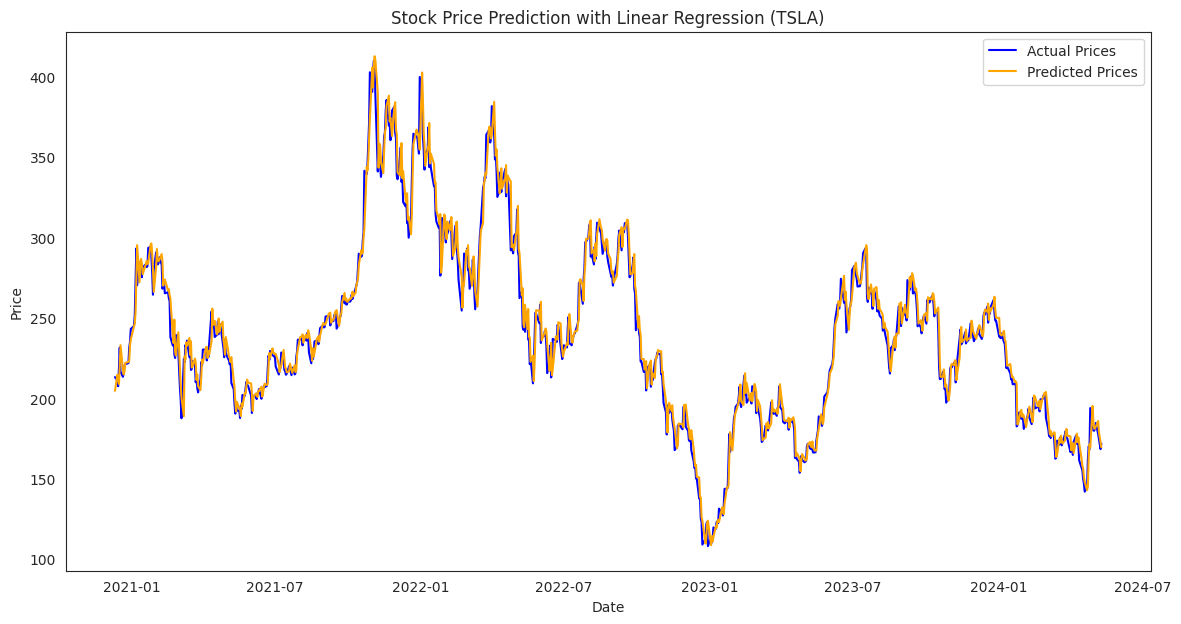

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(new_data.index[-len(ytest):].values, ytest.values, label='Actual Prices', color='blue')
plt.plot(new_data.index[-len(ytest):].values, p_lr, label='Predicted Prices', color='orange')
plt.title('Stock Price Prediction with Linear Regression ('+symbol+')')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()